In [1]:
import numpy as np
from datasets import *
from optim import GD, ADAM, IWLS

In [2]:
from utils.train_functions import cv
from utils.plots import (
    plot_figures_for_cv,
    plot_acc_boxplots
)

In [3]:
dataset_names = [name for name in DATASETS]
datasets = {
    name: load_dataset(name) for name in DATASETS
}

In [4]:
from datasets.preprocess_helpers import split_with_preprocess

print(help(split_with_preprocess))
len(split_with_preprocess(datasets['booking']))

Help on function split_with_preprocess in module datasets.preprocess_helpers:

split_with_preprocess(dataset: datasets.dataset_model.Dataset, interactions: bool = False, test_size: int = 0.2, random_state: int = None, vif=True) -> tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray]
    Train test split for given data frame including some additional preprocessing,
    removal of multicolinear columns using VIF, generating interactions, and adding column of ones.

None
Removing multicolinear columns in booking dataset...


4

In [5]:
l_vals_splits_dict, acc_vals_splits_dict = cv(datasets["booking"], n_splits=2)

CV split 1
Removing multicolinear columns in booking dataset...


ADAM:   4%|▍         | 19/500 [00:16<07:05,  1.13it/s]


Balanced accuracy of iwls is: 0.7606210187008465
Balanced accuracy of sgd is: 0.7213507031420117
Balanced accuracy of adam is: 0.7589848969764188
Balanced accuracy of lr is: 0.7636312581362232
Balanced accuracy of qda is: 0.5
Balanced accuracy of lda is: 0.7527441885238326
Balanced accuracy of dt is: 0.7994827281001458
Balanced accuracy of rf is: 0.736888833537767
CV split 2
Removing multicolinear columns in booking dataset...


ADAM:   7%|▋         | 33/500 [00:28<06:38,  1.17it/s]


Balanced accuracy of iwls is: 0.7516578906943401
Balanced accuracy of sgd is: 0.6857330426025807
Balanced accuracy of adam is: 0.7599880521608521
Balanced accuracy of lr is: 0.7489682614187205
Balanced accuracy of qda is: 0.5
Balanced accuracy of lda is: 0.7424018143647164
Balanced accuracy of dt is: 0.7961955093193145
Balanced accuracy of rf is: 0.7235663873148085


In [6]:
# plot_acc_boxplots(sgd_acc_list, adam_acc_list, iwls_acc_list)

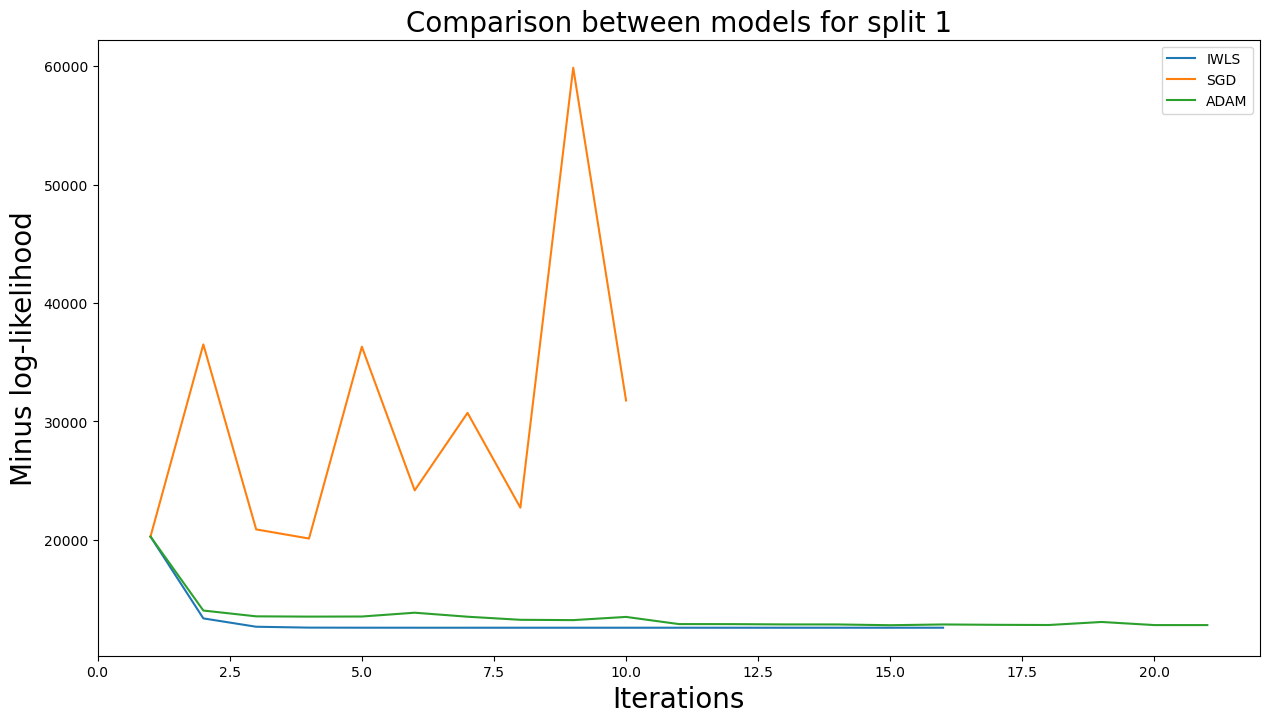

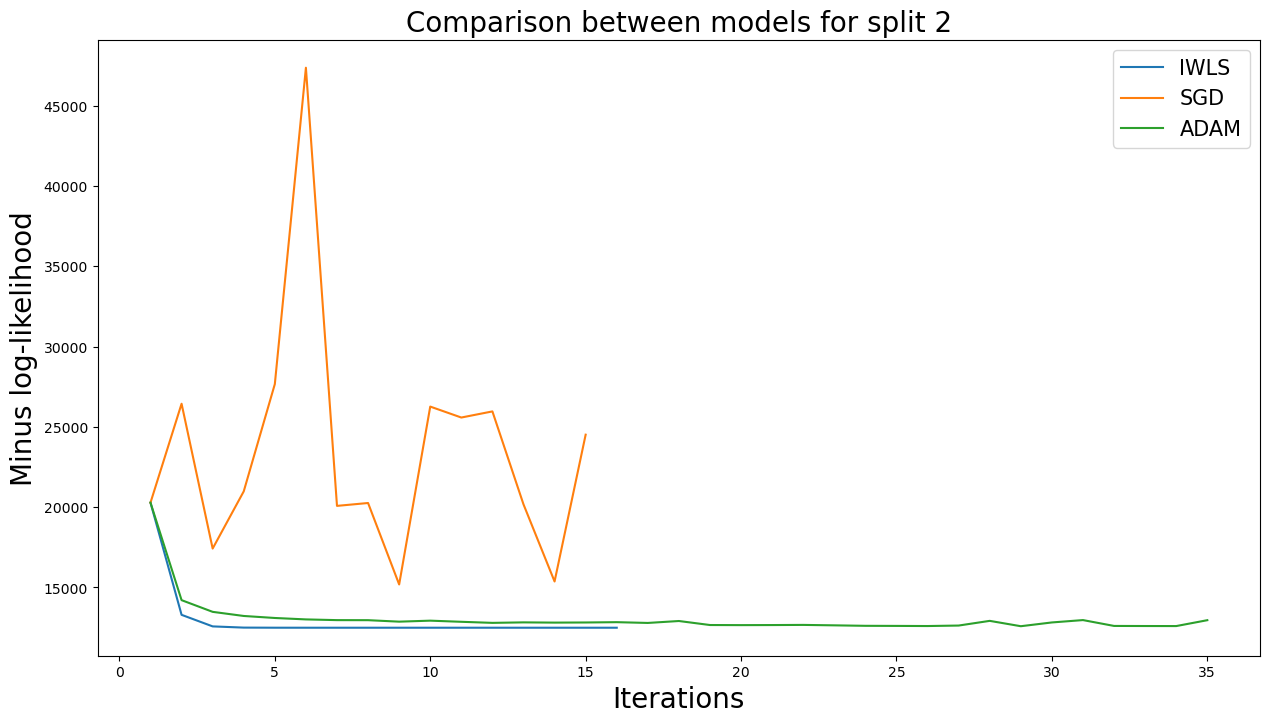

In [7]:
plot_figures_for_cv(l_vals_splits_dict["iwls"], l_vals_splits_dict["sgd"], l_vals_splits_dict["adam"])

### Data generated from logistic model

In [8]:
beta1 = 2

n1 = 1000
x1 = np.random.exponential(1, size=n1)

n2 = 1000
x2 = np.random.exponential(1/(beta1+1), size=n2)

X = np.expand_dims(np.concatenate((x1, x2), axis=0), axis=1)
X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
y = np.expand_dims(np.concatenate((np.ones((1, n1)), np.zeros((1, n2))), axis=1)[0], 1)

In [9]:
pi = n1 / (n1 + n2)
b0 = -np.log((1 + beta1) * ((1-pi)/pi))

In [10]:
iwls = IWLS(n_iter=100)
gd = GD(learning_rate=0.0002, n_epoch=200)
adam = ADAM(learning_rate=0.0002, n_epoch=200)

l_iwls_vals, best_beta_iwls = iwls.fit(X, y)
l_sgd_vals, best_beta_sgd = gd.fit(X, y)
l_adam_vals, best_beta_adam = adam.fit(X, y)

ADAM:  83%|████████▎ | 166/200 [00:08<00:01, 18.54it/s]


In [11]:
print(f"Theoretical betas: b0: {b0}, b1: {beta1}" )
print(f"Empirical betas for SGD without optimizers: b0: {best_beta_sgd[0]}, b1: {best_beta_sgd[1]}")
print(f"Empirical betas for SGD with ADAM: b0: {best_beta_adam[0]}, b1: {best_beta_adam[1]}")
print(f"Empirical betas for IWLS: b0: {best_beta_iwls[0][0]}, b1: {best_beta_iwls[1][0]}")

Theoretical betas: b0: -1.0986122886681096, b1: 2
Empirical betas for SGD without optimizers: b0: -1.117506489491802, b1: 2.0130851893221715
Empirical betas for SGD with ADAM: b0: -1.2172827513221622, b1: 2.200820989134105
Empirical betas for IWLS: b0: -1.2173326489898222, b1: 2.2005362088543423
